# 미니프로젝트 : 가위바위보 분류기를 만들자

## 1. 데이터 불러오기 + Resize 하기

#### PIL 라이브러리 불러오기

In [569]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 가위 - 이미지의 크기 28x28로 변경하기

In [570]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2421  images to be resized.
2421  images resized.
가위 이미지 resize 완료!


#### 바위 - 이미지의 크기 28x28로 변경하기

In [571]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

2439  images to be resized.
2439  images resized.
바위 이미지 resize 완료!


#### 보 - 이미지의 크기 28x28로 변경하기

In [572]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2455  images to be resized.
2455  images resized.
보 이미지 resize 완료!


#### 데이터읽기 및 라벨링

In [573]:
import numpy as np

def load_data(img_path, number_of_data=7315):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 7315 입니다.
x_train shape: (7315, 28, 28, 3)
y_train shape: (7315,)


#### 이미지 불러오기 (x_train[0])

라벨:  0


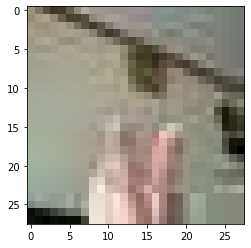

In [574]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [575]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import random 

#### 모델 만들기

In [577]:

n_channel_1=27
n_channel_2=40
n_channel_3=30
n_dense=16
n_train_epoch=10


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), input_shape=(28,28,3), kernel_initializer='he_normal',padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu',kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax',kernel_initializer='he_normal'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()  

Model에 추가된 Layer 개수:  16
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 28, 28, 27)        756       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 27)        108       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 27)        0         
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 14, 14, 27)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 12, 12, 40)        9760      
_________________________________________________________________
batch_normalization_11 (Batc (None, 12, 12, 40)        160       
_________________________________________________________________
activation_10 (Activation)  

## 3. 딥러닝 네트워크 학습시키기

#### 채널수에 대한 정보를 넣기위해 reshape 해주기 => 기존에 채널 수에 대한 정보가 존재하므로 생략해도 상관없어보인다

In [578]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))


x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.


print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))



Before Reshape - x_train_norm shape: (7315, 28, 28, 3)
After Reshape - x_train_reshaped shape: (7315, 28, 28, 3)


#### x_train 학습데이터로 딥러닝 네트워크 학습시키기

In [579]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


#### 이미지 증강(Image Augmentation) :  알고리즘이 이미지의 불변하는 표현(invariant representation)을 학습하는 것

In [580]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rotation_range=10,shear_range=0.5,width_shift_range=0.15, height_shift_range=0.10, horizontal_flip=True)



model.fit_generator(datagen.flow(x_train_reshaped, y_train,batch_size=32),
                   steps_per_epoch=x_train_reshaped.shape[0]//32,epochs=n_train_epoch,verbose=2)
        
#model.fit(x_train_reshaped, y_train,epochs=n_train_epoch)        

Epoch 1/10
228/228 - 43s - loss: 1.1040 - accuracy: 0.4051
Epoch 2/10
228/228 - 3s - loss: 0.9574 - accuracy: 0.5117
Epoch 3/10
228/228 - 3s - loss: 0.8552 - accuracy: 0.5901
Epoch 4/10
228/228 - 3s - loss: 0.7625 - accuracy: 0.6599
Epoch 5/10
228/228 - 3s - loss: 0.6698 - accuracy: 0.7033
Epoch 6/10
228/228 - 3s - loss: 0.6227 - accuracy: 0.7380
Epoch 7/10
228/228 - 3s - loss: 0.5640 - accuracy: 0.7660
Epoch 8/10
228/228 - 3s - loss: 0.5371 - accuracy: 0.7773
Epoch 9/10
228/228 - 3s - loss: 0.5045 - accuracy: 0.8072
Epoch 10/10
228/228 - 3s - loss: 0.4801 - accuracy: 0.8157


## 4. 얼마나 잘 만들었지 확인하기

#### test셋으로 얼마나 잘 만들었는지 확인하기

#### test용 데이터 불러오기 + Resize 하기

In [581]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/paper"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


def load_data(img_path, number_of_data=1527):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

509  images to be resized.
509  images resized.
가위 이미지 resize 완료!
509  images to be resized.
509  images resized.
바위 이미지 resize 완료!
509  images to be resized.
509  images resized.
보 이미지 resize 완료!
테스트데이터(x_train)의 이미지 개수는 1527 입니다.
x_test shape: (1527, 28, 28, 3)
y_test shape: (1527,)


#### 이미지 불러오기(x_test[457])

라벨:  0


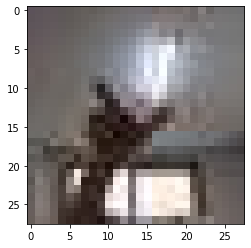

In [582]:
import matplotlib.pyplot as plt
plt.imshow(x_test[457])
print('라벨: ', y_test[457])

#### 훈련시킨 model을 사용하여 test_accuracy 측정하기

In [583]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

48/48 - 8s - loss: 0.9461 - accuracy: 0.7014
test_loss: 0.9460560083389282 
test_accuracy: 0.7013752460479736


****

## 회고

## 정확도 높인 과정

1. train set : 가위,바위,보 데이터 각 1200개 정도 => 약 3600개의 데이터  / test set : train set 과 전혀 다른, 새로운 데이터 (2명의 데이터)를 가져옴 **(테스트 정확도 : 0.3 초반대)** 

2. train set에서 가위 데이터 개수보다 바위와 보의 데이터 개수가 150개 정도 많아서 비슷하게 맞춰주었다. 각 1050개 정도의 데이터를 가짐, 파라미터를 조절함 **(테스트 정확도 : 0.38~0.42)** 

3. 필터 개수를 엄청 늘리니 정확도가 올라감 (ex) n_channel_1=256, n_channel_2=516, n_channel_3= 516,n_dense=16                          => **(테스트 정확도 : 0.60 정도)** => But, 모델이 복잡해질수록 오버피팅의 확률이 높아진다고 하여 다른 방법을 찾아봄 
4. 층을 하나 더 만들어줌 (층이 깊어질수록 정확도가 좋아진다고 하여) =>정확도가 올라감
5. train set 개수가 적다고 생각하여 데이터 증강을 하였음 => 정확도가 조금 올라감
6. train 데이터를 자체를 추가해서 데이터 개수를 증가시켜봄 (양재캠퍼스 데이터까지 합하기) => 데이터 증강 없애고 적용했음 => 정확도 좀 올라감 => **(테스트 정확도 : 0.48정도)**
7. test set를 2명의 데이터만 사용한 것이 너무 일반화된 test set인거 같다 => test set 이 다양하지 않은 거 같으므로 여러명(5명)의데이터를 test set으로 사용함 => **(테스트 정확도 : 0.57~0.6)**
8. 이미지 증강 적용 => 정확도 올랐음
9. 이미지 증강 적용안하고 파라미터 조절 => 필터의 개수를 줄이면 데이터 증강한 경우가 보통 정확도가 더 높았다.
10. n_channel_1=12 n_channel_2=15 n_channel_3=10 n_dense=16 n_train_epoch=8 => 했을때 **(테스트 정확도 : 53)**
11. 필터의 개수는 하이퍼파라미터이므로 정해진 규칙은 없지만 보통 필터의 개수가 input 필터의 크기(3x3x3)보다 커야된다고 하여, 여기선 27보다 크게 설정함 => 27,28,29로 해주었더니 정확도 올라감 **(테스트 정확도 : 61)** 
12. +이미지 증강함 => **(테스트 정확도 : 67)**
13. 모델을 개선하기 위한 방법들(가중치 초기화(Weight initialization),배치 정규화(Batch Normalization),드랍아웃(Dropout)) 사용 + 필터 개수 증가시킴 => **(테스트 정확도 : 0.7)**

## 여러번의 시도를 통해 느낀 점/ 의문점

* 에폭이 높다고 좋은것이 아니다. => 너무 높게 설정해도 특정 epoch에서는 다시 정확도가 떨어진다. 따라서 적당한 파라미터를 찾아야됨
* 훈련정확도가 높다고 테스트 정확도가 높은건 아니다 => (ex) n_channel_1=20,n_channel_2=40,n_channel_3=40,n_dense=16,n_train_epoch=10에서 에폭을 줄였는데 훈련 정확도: 0.7920,테스트 정확도 0.6797642707824707 / 에폭을 늘렸을때는 훈련 정확도 0.99가 나왔지만 test정확도는 0.6보다 더 떨어졌다.
* 20,40,30,16,10 로 파라미터 조정했을 때, 데이터증강,패딩,정규화,초기화 없이도 테스트 정확도가 약 0.6정도가 나온다. 따라서 데이터증강, 패딩,정규화,초기화는 항상 테스트 정확도를 올려주는 건 아닌거 같다.
* 재현가능한 결과를 어떻게 얻을까? 돌릴 때마다 다른 결과가 나온다. 어떻게 해결해야되나..


## 새로 알게된 개념 정리

### 1. Keras에서 재현가능한 결과를 얻기(Reproducibility)

#### 코드

In [ ]:

#### [랜덤시드 고정시키기]
'''
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
seed_everything(123)

'''
#### or
'''
seed_value= 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value) # tensorflow 2.x

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

'''

* 재현가능한 결과를 얻기위해 random seed를 써야 된다고 생각하여 검색해보았다.
=> tensorflow에서의 random seed 설정은 사실 두 가지 seed에 의존함 = 하나가 global seed이고, 다른 하나는 operation-level seed
=> operation-level seed는 initializer나 random.uniform과 같은 함수 내에서 따로 seed를 지정할 수 있는 것들을 의미함.

따라서 두 가지 seed 설정에 따른 동작은 다음과 같다.

* global seed와 operation seed를 모두 설정하지 않은 경우

    -> 무작위로 seed를 선택해 사용된다.(매번 다른 결과)
 

* global seed는 설정했지만, operation seed는 설정하지 않은 경우

    -> global seed와 연관되어서 고유한 랜덤 시퀀스를 얻는다. 즉, 매번 다른 결과이긴 하지만, 그 결과는 일정한 시퀀스를 따라서 얻게 된다. (seed를 세팅했을 때, 프로그램을 껏다켜도 seed가 동일하면 랜덤값의 순서는 동일한 것과 유사한 것으로 확인됨.)

 

* operation seed는 설정했지만, global seed를 설정하지 않은 경우

    -> 매번 다른 결과가 나타남.


* global seed와 operation seed를 모두 설정한 경우, 두 seed를 정해서 같이 사용하게 되면 random 시퀀스를 결정해버리기 때문에 매번 동일한 결과를 얻을 수 있음.


출처: https://junstar92.tistory.com/98 [별준 코딩]








**But,** 위의 코드를 사용하여도 결과가 계속 바뀜 => 왜 그런걸까..? 의문점이 든다.

### 2. 필터 개수를 정하는 기준이 있을까..?

n_channel_1, n_channel_2, n_channel_3, n_dense, n_train_epoch 이 하이퍼파라미터를 찾는 과정에서 혹시 필터 개수를 정하는 기준이 따로 있을까 궁금했다. 구글링 결과 사람이 직접 정해주는 하이퍼파라미터이기 때문에 여러번의 시도를 통해 찾아내야되는 것이고, 따로 정해는 룰은 없다고 한다.

하지만 이렇게 하면 좋다~ 라는 답변을 발견하여서 그걸 적용해보았다.

input filter의 크기보다는 크게 설정하는 것이 좋다고하여서 3 * 3 * 3 = 27 보다 크게 설정하였다. 만약 input 필터의 크기보다 작은 숫자를 입력하면 이미지에 대한 유용한 정보들이 사라져 좋지 않을 수도 있다고 한다. 하지만 이것도 일반적인 룰은 아니라고 한다. 이미지 복잡도가 낮은 글자 인식 같은 경우, 필터 개수가 작은 것이 더 도움이 된다고 한다.

### 3. 데이터 증강 / 이미지 증강

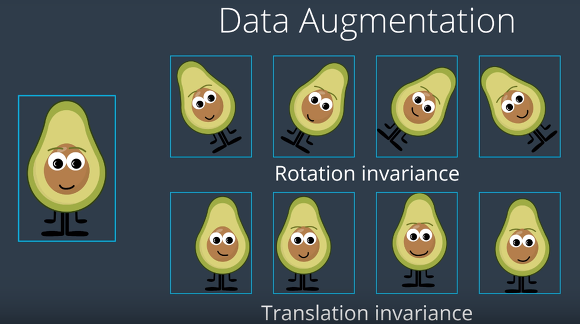
* training set의 이미지중 랜덤한 값으로 이동한 이미지를 생성하여 set에 추가해주면 된다. 이렇게 **training set을 증강시키는 것**을 데이터 증강(Data Augmentation)이라 부른다.
* train시 over-fitting을 방지하려면, augmentation 기법을 통해서 train set을 최대한 많이 확보할수록 유리하다
* 따라서 testing set을 통한 테스트 진행시 학습단계에서 일반화(generalization)가 더 잘 적용되어 더 나은 퍼포먼스를 보여준다.
* rotation_range: 이미지 회전 범위 (degrees), shear_range: 임의 전단 변환 (shearing transformation) 범위
* width_shift, height_shift: 그림을 수평 또는 수직으로 랜덤하게 평행 이동시키는 범위 (원본 가로, 세로 길이에 대한 비율 값)
* horizontal_flip: True로 설정할 경우, 50% 확률로 이미지를 수평으로 뒤집는다. 원본 이미지에 수평 비대칭성이 없을 때 효과적. 즉, 뒤집어도 자연스러울 때 사용하면 좋다.

### 4. 패딩

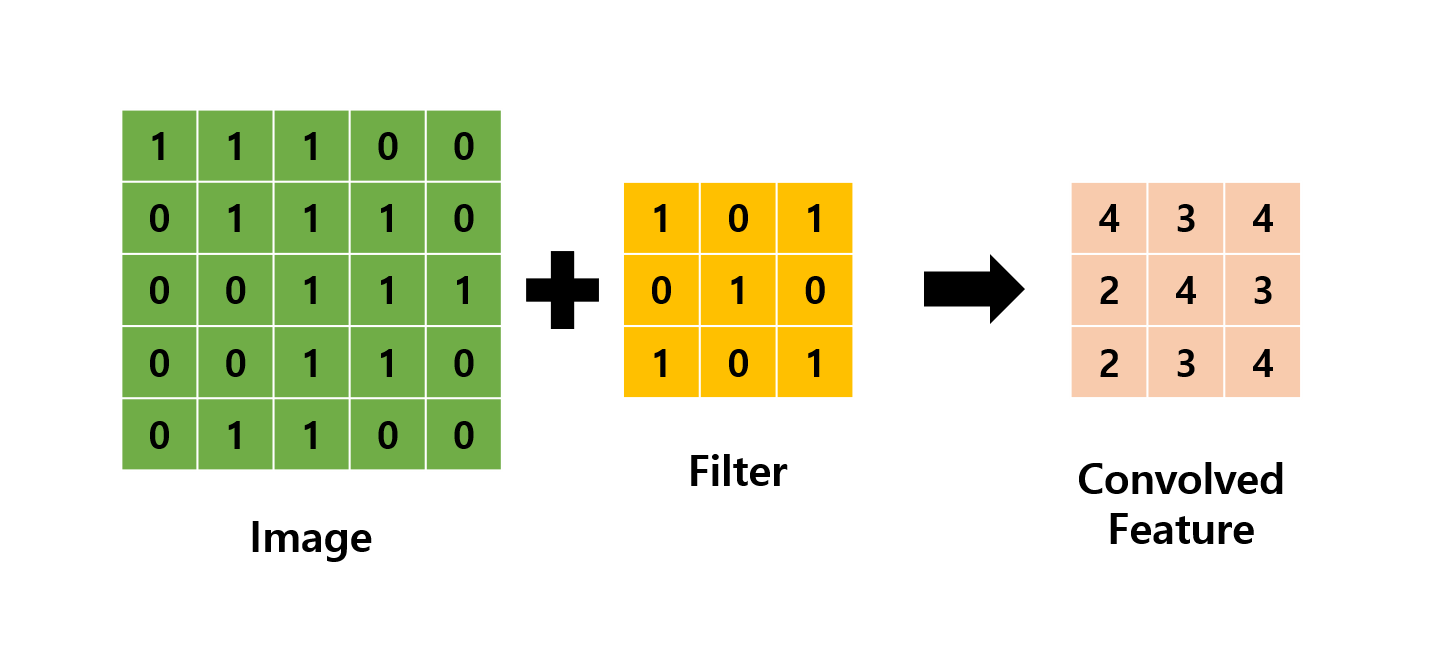
* Convolution 레이어에서는 Filter와 Stride의 작용으로 Feature map의 크기는 입력데이터보다 작다.

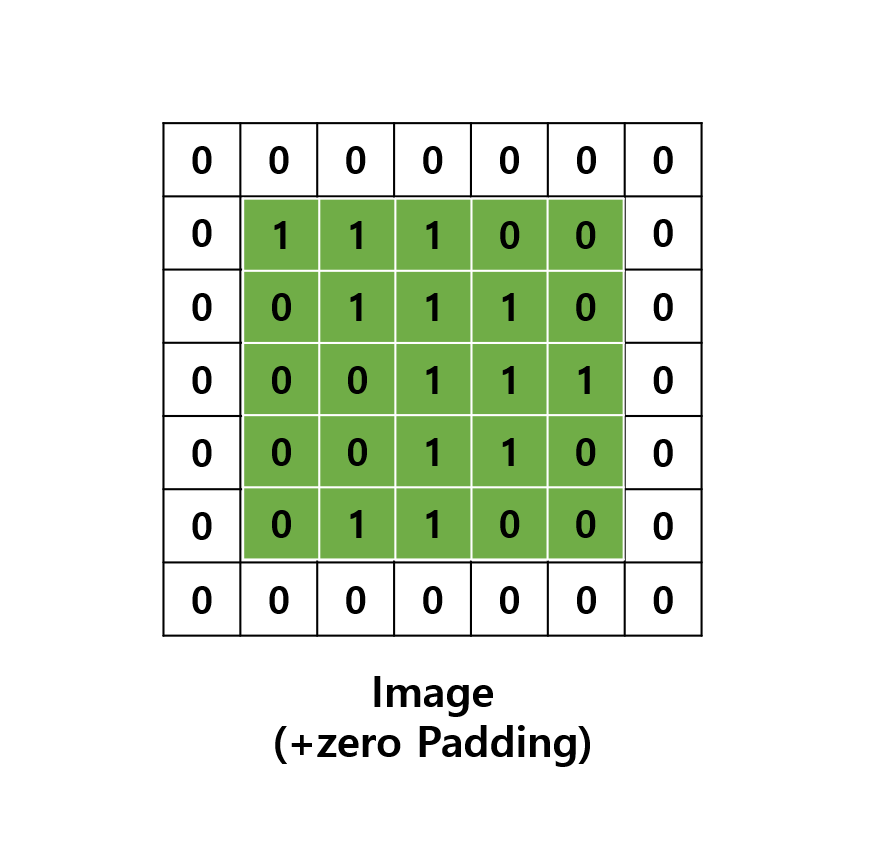
* 입력데이터보다 출력데이터가 작아지는것을 방지하는 방법이 Padding
* 위와 같이 0으로 둘러싸는 padding을 zero padding, 단순히 0을 덧붙였으므로 특징이나 분해능에는 영향을 미치지 않음.
* 이렇게 padding을 하게 되면 convolution을 해도 크기가 작아지지 않음.
* Padding에는 두가지 옵션이 있다. 
    - valid : padding 0을 뜻함. 즉 입력보다 출력의 크기가 작아짐.
    - same : padding이 존재하여 입력과 출력의 크기는 같음.

### 5. Pooling의 역할

* 적당히 크기도 줄이고, 특정 feature를 강조할 수 있어야 하는데 그 역할을 Pooling 레이어에서 함.

* 처리방법은 총 세가지! => Max Pooling, Average Pooling, Min Pooling
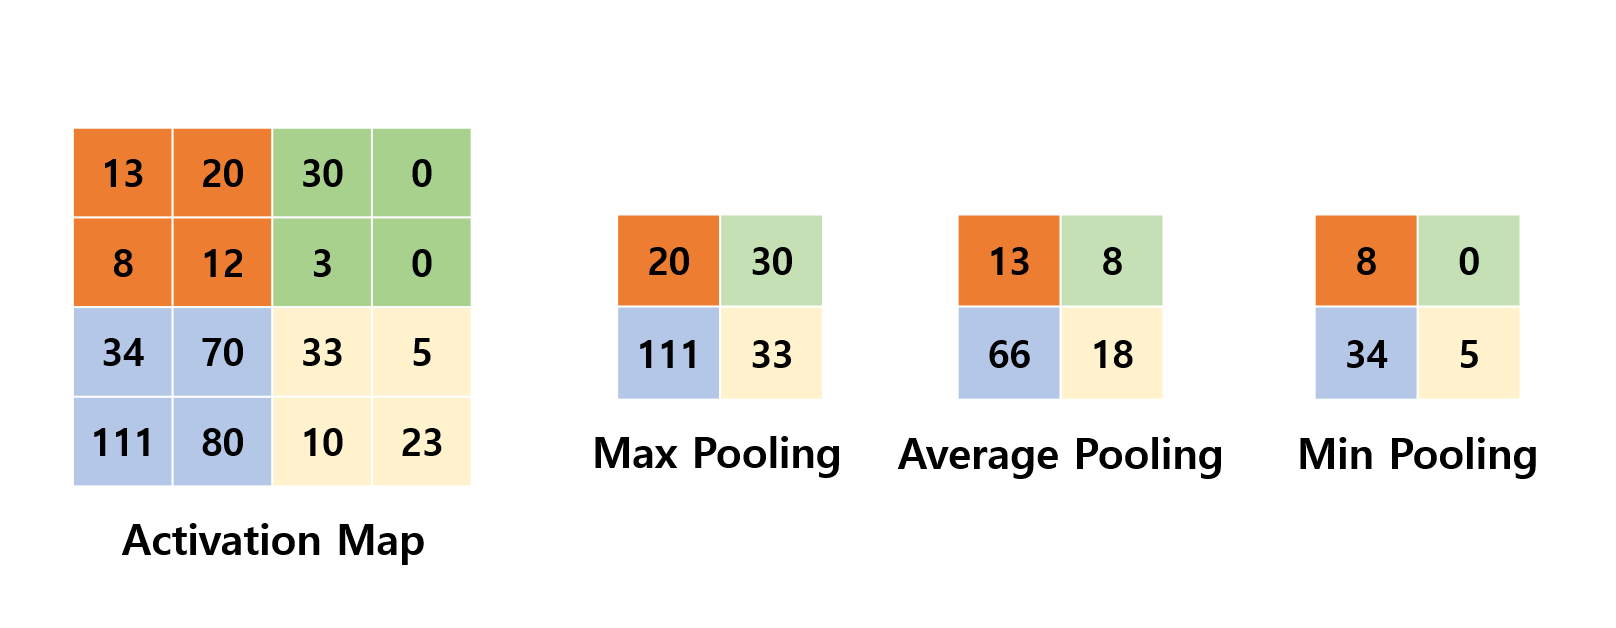
출처 : https://gruuuuu.github.io/machine-learning/cnn-doc/

### 6. 학습과정에서 개선하는 방법

1. 배치 정규화(Batch Normalization)
    - 배치 정규화는 인공신경망에 입력값을 평균 0, 분산 1로 정규화(normalize)해 네트워크의 학습이 잘 일어나도록 돕는 방식
2. 드롭아웃(Dropout)
    - 과적합(overfitting)” 문제이며, 드랍아웃은 이러한 상황을 방지하기 위한 장치이다. 일부러 모델을 학습할 때 일부 노드의 activation을 지워버려 다소 “멍청한(기억력이 떨어지는)” 모델을 만들어 문제에 대한 과적합(overfitting)을 막는다
3. 가중치초기화(Weight Initialization)
    - **가중치 초기화 방법을 따로 설정해 주지 않으면** 기본적으로 케라스 레이어의 가중치 초기화 방식은 일정 구간 내에서 랜덤하게 찍는 random_uniform이다. 하지만 이러한 방식은 오차 역전파(back propagation) 과정에서 미분한 gradient가 지나치게 커지거나(exploding gradient) 소실되는(vanishing gradient) 문제에 빠질 위험성이 크다
    - He 초기화(he_uniform, he_normal): ResNet으로도 유명한 마이크로소프트(현재는 Facebook)의 Kaiming He가 2015년에 제안한 가장 최신의 초기화 방식이다. 수식을 보면 Xavier Initialization을 조금 개선한 것인데, 경험적으로 더 좋은 결과를 내었다고 한다.